In [1]:
import matplotlib.pyplot as plt
import nengo
import nengo_spa as spa

# Routed sequence

In [8]:
# Number of dimensions for the Semantic Pointers
dim = 16
vocab = spa.Vocabulary(dim)
# Adding semantic pointers to the vocabulary
vocab.populate("A; B; C; D; E")

# Create the spa.SPA network to which we can add SPA objects
with spa.Network(label='Routed sequence') as model:

    # Function that provides the model with an initial input semantic pointer.
    def start(t):
        if t < 0.1:  # Duration of the initial input = 0.1
            return "A"
        return "0"

    # Creating a working memory/cortical element
    state = spa.State(vocab, feedback=1, feedback_synapse=0.01)
    spa_input = spa.Transcode(start, output_vocab=vocab)

    # Specifying the action mappings (rules) for BG and Thal
    spa_input >> state
    with spa.ActionSelection() as action_sel:
        spa.ifmax(spa.dot(spa.sym.A, state),
                spa.sym.B >> state)
        spa.ifmax(spa.dot(spa.sym.B, state),
                spa.sym.C >> state)
        spa.ifmax(spa.dot(spa.sym.C, state),
                spa.sym.D >> state)
        spa.ifmax(spa.dot(spa.sym.D, state),
                spa.sym.E >> state)
        spa.ifmax(spa.dot(spa.sym.E, state),
                spa.sym.A >> state)

    # Function that provides the model with an initial input semantic pointer.
    def start(t):
        if t < 0.1:  # Duration of the initial input = 0.1
            return "A"
        return "0"

    state_p = nengo.Probe(state.output)

    p_thalamus = nengo.Probe(action_sel.thalamus.output, synapse=0.01,label='thalamus')
    p_utility = nengo.Probe(action_sel.bg.input, synapse=0.01,label='utility')


/Users/beep/PycharmProjects/nengoPlayground/venv/lib/python3.8/site-packages/nengo_spa/modules/basalganglia.py:174: UserWarning: SciPy is not installed, so BasalGanglia will use the default decoder solver. Installing SciPy may improve BasalGanglia performance.
  warnings.warn(


In [9]:
with nengo.Simulator(model) as sim:
    sim.run(1)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

/Users/beep/PycharmProjects/nengoPlayground/venv/lib/python3.8/site-packages/nengo/builder/optimizer.py:654: UserWarning: Skipping some optimization steps because SciPy is not installed. Installing SciPy may result in faster simulations.
  warnings.warn(


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


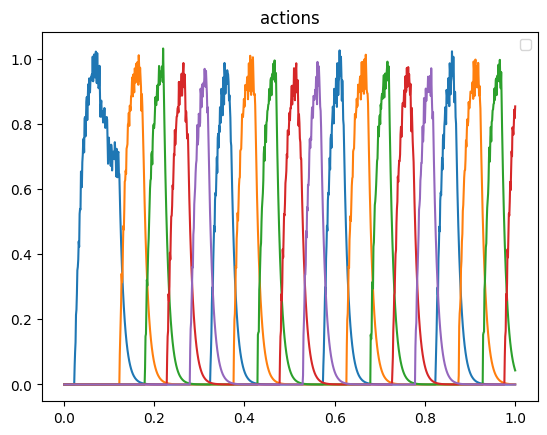

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


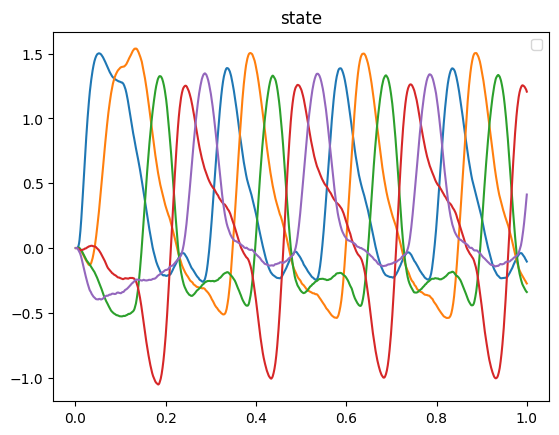

In [15]:
plt.plot(sim.trange(), sim.data[p_thalamus])
plt.legend()  # not sure how to label individual ensembles in EnsembleArray
plt.title('actions')
plt.show()

plt.plot(sim.trange(), sim.data[p_utility])
plt.legend()  # not sure how to label individual ensembles in EnsembleArray
plt.title('state')
plt.show()